<a href="https://colab.research.google.com/github/sainisatish/DeepLearningFromScratch/blob/main/Cat_And_Dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [ ]:
files.upload()

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:43<00:00, 20.6MB/s]
100% 812M/812M [00:43<00:00, 19.6MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

In [7]:
import os,shutil,pathlib

In [8]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [9]:
def make_subset(subset_name, start_index, end_index): 
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [10]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500) 
make_subset("test", start_index=1500, end_index=2500)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
 inputs = keras.Input(shape=(180,180,3))
x=layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs=inputs,outputs=outputs)



In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory 

In [13]:
train_dataset=image_dataset_from_directory(new_base_dir/"train",
                                           image_size=(180,180),
                                           batch_size=32)

validation_dataset = image_dataset_from_directory(new_base_dir /"validation",
                                                  image_size=(180,180),
                                                  batch_size=32)

test_size = image_dataset_from_directory(new_base_dir /"test",
                                         image_size=(180,180),
                                         batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [14]:
for data_batch,label_batch in train_dataset:
    print(f"data batch shape {data_batch.shape}")
    print(f"label batch shape { label_batch.shape}")
    break

data batch shape (32, 180, 180, 3)
label batch shape (32,)


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only=True,monitor="val_loss")]

In [ ]:
history = model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 15s 73ms/step - loss: 0.6978 - accuracy: 0.5120 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6937 - accuracy: 0.5370 - val_loss: 0.6956 - val_accuracy: 0.5070
Epoch 3/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6744 - accuracy: 0.6025 - val_loss: 0.6554 - val_accuracy: 0.6310
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6519 - accuracy: 0.6435 - val_loss: 0.6247 - val_accuracy: 0.6510
Epoch 5/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6288 - accuracy: 0.6535 - val_loss: 0.6228 - val_accuracy: 0.6460
Epoch 6/30
63/63 [==============================] - 4s 63ms/step - loss: 0.5947 - accuracy: 0.6805 - val_loss: 0.5969 - val_accuracy: 0.6820
Epoch 7/30
63/63 [==============================] - 5s 79ms/step - loss: 0.5757 - accuracy: 0.6945 - val_loss: 0.6570 - val_accuracy: 0.6540
Epoch 8/30
6

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accuracy,val_accuracy,loss,val_loss = history.history["accuracy"],history.history["val_accuracy"],history.history["loss"],history.history["val_loss"]

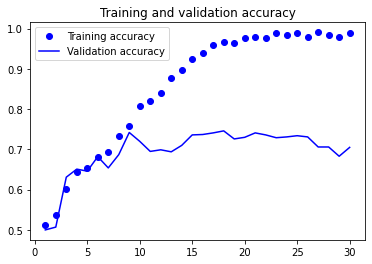

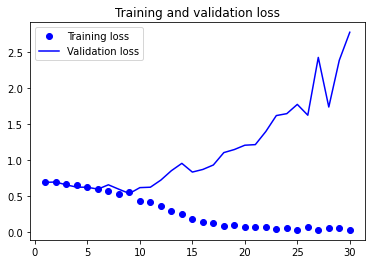

In [ ]:
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(test_size)

63/63 [==============================] - 4s 43ms/step - loss: 2.9484 - accuracy: 0.6895


Performing Data Augmentation 

In [15]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
    )

In [16]:
inputs = keras.Input(shape=(180,180,3))
x= data_augmentation()(inputs)
x= layers.Rescaling(1./255)()
x= layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=256,kernel_size=3,activation='relu')(x)
x= layers.Flatten()(x)
x= layers.Dense(1,activation='sigmoid')(x)
model_aug = keras.Model(inputs=inputs,output=outputs)

ValueError: ignored